In [1]:
# Colab에 Mecab 설치
!git clone https://github.com/SOMJANG/Mecab-ko-for-Google-Colab.git
%cd Mecab-ko-for-Google-Colab
!bash install_mecab-ko_on_colab190912.sh

Cloning into 'Mecab-ko-for-Google-Colab'...
remote: Enumerating objects: 138, done.
remote: Counting objects: 100% (47/47), done.
remote: Compressing objects: 100% (38/38), done.
remote: Total 138 (delta 26), reused 22 (delta 8), pack-reused 91
Receiving objects: 100% (138/138), 1.72 MiB | 11.12 MiB/s, done.
Resolving deltas: 100% (65/65), done.
/content/Mecab-ko-for-Google-Colab
Installing konlpy.....
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.4/19.4 MB 29.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 488.6/488.6 kB 35.7 MB/s eta 0:00:00
Done
Installing mecab-0.996-ko-0.9.2.tar.gz.....
from https://bitbucket.org/eunjeon/mecab-ko/downloads/mecab-0.996-ko-0.9.2.tar.gz
--2024-01-24 05:39:08--  https://bitbucket.org/eunjeon/mecab-ko/downloads/mecab-0.996-ko-0.9.2.tar.gz
Resolving bitbucket.org (bitbucket.org)... 104.192.141.1, 2406:da00:ff00::22c0:3470
Connecting to bitbucket.org (bitbucket.org)|104.192.141.1|:443... connected.
HTTP request sent, awaiting response

In [2]:
!pip install konlpy
!pip install mecab-python
!bash <(curl -s https://raw.githubusercontent.com/konlpy/konlpy/master/scripts/mecab.sh)

  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 581.7/581.7 kB 4.2 MB/s eta 0:00:00
  Created wheel for mecab-python: filename=mecab_python-1.0.0-py3-none-any.whl size=1232 sha256=c5885f40ebcb998400ae366ca439284ce4374bb66a4c8d728d6b991370724fe2
  Stored in directory: /root/.cache/pip/wheels/ec/41/c8/ce8fb469be2547ce596c4000613806505dc54c296aae45da71
Successfully built mecab-python
mecab-ko is already installed
mecab-ko-dic is already installed
mecab-python is already installed
Done.


In [3]:
from konlpy.tag import Mecab
mecab = Mecab()
#NameError: name 'Tagger' is not defined 오류 발생 시 런타임을 재실행 해주세요.

In [4]:
# 한글 자모 단위 처리 패키지 설치
!pip install hgtk

In [5]:
# fasttext 설치
!git clone https://github.com/facebookresearch/fastText.git
%cd fastText
!make
!pip install .

Cloning into 'fastText'...
remote: Enumerating objects: 3986, done.
remote: Counting objects: 100% (1014/1014), done.
remote: Compressing objects: 100% (180/180), done.
remote: Total 3986 (delta 888), reused 854 (delta 830), pack-reused 2972
Receiving objects: 100% (3986/3986), 8.29 MiB | 27.91 MiB/s, done.
Resolving deltas: 100% (2526/2526), done.
/content/Mecab-ko-for-Google-Colab/fastText
c++ -pthread -std=c++17 -march=native -O3 -funroll-loops -DNDEBUG -c src/args.cc
c++ -pthread -std=c++17 -march=native -O3 -funroll-loops -DNDEBUG -c src/autotune.cc
c++ -pthread -std=c++17 -march=native -O3 -funroll-loops -DNDEBUG -c src/matrix.cc
c++ -pthread -std=c++17 -march=native -O3 -funroll-loops -DNDEBUG -c src/dictionary.cc
c++ -pthread -std=c++17 -march=native -O3 -funroll-loops -DNDEBUG -c src/loss.cc
c++ -pthread -std=c++17 -march=native -O3 -funroll-loops -DNDEBUG -c src/productquantizer.cc
c++ -pthread -std=c++17 -march=native -O3 -funroll-loops -DNDEBUG -c src/densematrix.cc
c++ -pt

## 1. 데이터 로드

In [6]:
import re
import pandas as pd
import urllib.request
from tqdm import tqdm
import hgtk

In [7]:
# 네이버 쇼핑 리뷰
urllib.request.urlretrieve("https://raw.githubusercontent.com/bab2min/corpus/master/sentiment/naver_shopping.txt", filename="ratings_total.txt")

('ratings_total.txt', <http.client.HTTPMessage at 0x7c09f1cabac0>)

In [8]:
total_data = pd.read_table('ratings_total.txt', names=['ratings', 'reviews'])
print('전체 리뷰 개수 :',len(total_data)) # 전체 리뷰 개수 출력

전체 리뷰 개수 : 200000


In [9]:
total_data.head()

ratings                                            reviews
0        5                                            배공빠르고 굿
1        2                      택배가 엉망이네용 저희집 밑에층에 말도없이 놔두고가고
2        5  아주좋아요 바지 정말 좋아서2개 더 구매했어요 이가격에 대박입니다. 바느질이 조금 ...
3        2  선물용으로 빨리 받아서 전달했어야 하는 상품이었는데 머그컵만 와서 당황했습니다. 전...
4        5                  민트색상 예뻐요. 옆 손잡이는 거는 용도로도 사용되네요 ㅎㅎ

## 2. hgtk 튜토리얼



word embedding이 단어 단위의 임베딩이었다면, character embedding은 문자 단위의 임베딩입니다. 한국어를 character embedding할 수 있는 것이 바로 자음 모음 분리기 hgtk입니다.

 영어는 하나의 알파벳(52자)를 기준으로 character embedding을 하지만, 한국어에서 하나의 음절별로 character embedding을 하면 11172개의 음절이 있기 때문에 계산량이 너무 많습니다. 따라서 그보다 작은 단위인 자음,모음으로 분리하는 것입니다.

 >참고 repo: https://github.com/bluedisk/hangul-toolkit

In [10]:
# 한글인지 체크
print(hgtk.checker.is_hangul('ㄱ'))
print(hgtk.checker.is_hangul('12'))
print(hgtk.checker.is_hangul('a'))

True
False
False


In [11]:
# 음절을 초성, 중성, 종성으로 분해
print(hgtk.letter.decompose('남'))
# 초성, 중성, 종성을 하나의 음절로 결합
print(hgtk.letter.compose('ㄴ', 'ㅏ', 'ㅁ'))

('ㄴ', 'ㅏ', 'ㅁ')
남


In [12]:
# 결합할 수 없는 상황에서는 에러 발생
try:
  hgtk.letter.compose('ㄴ', 'ㅁ', 'ㅁ') # 중성이 없는 경우
except:
  print('에러 발생')

에러 발생


## 3. 데이터 전처리

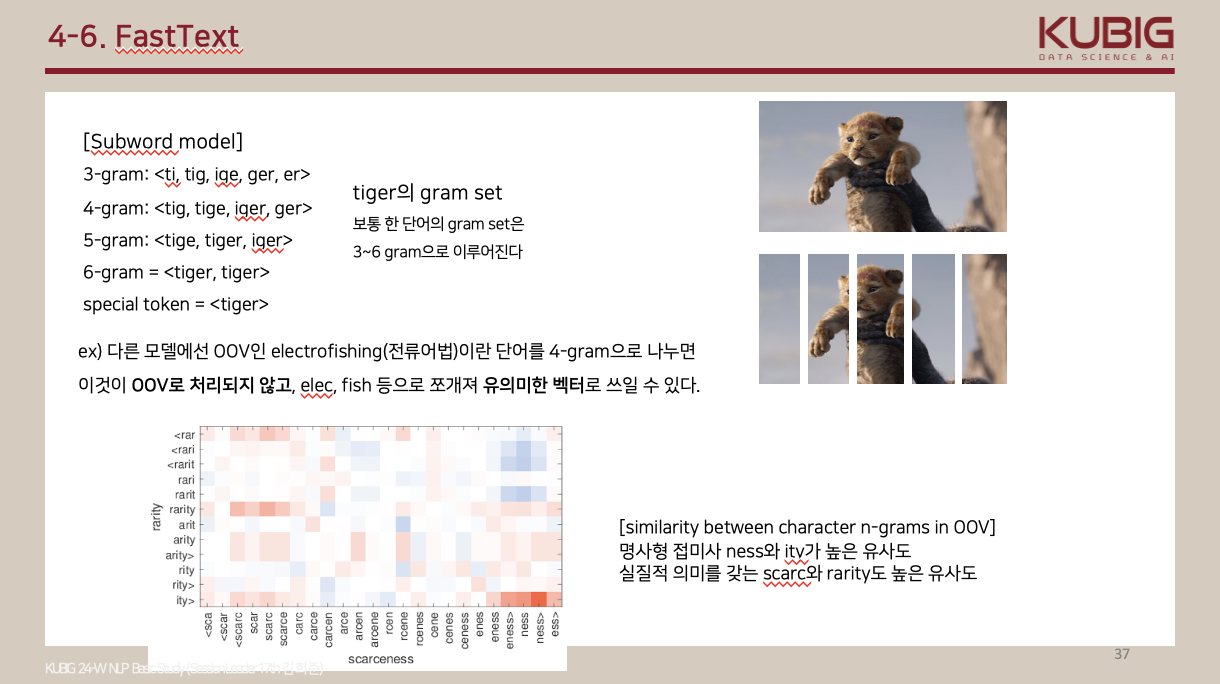

fasttext는 subword 단위로 임베딩 벡터를 생성하는 도구입니다. 한국어에서 subword는 자음 모음 단위로 생각할 수 있습니다. fasttext에 학습시킬 데이터를 만들기 위해 앞서 로드한 네이버 쇼핑 리뷰들을 hgtk를 활용해 자음 모음 단위로 전처리해봅시다.

In [13]:
def word_to_jamo(token):
  def to_special_token(jamo): # 경우에 따라 초, 중, 종성이 다 있는 게 아닌 경우도 있다. 이 경우 -를 반환해주는 함수
    if not jamo:
      return '-'
    else:
      return jamo

  decomposed_token = ''
  for char in token:
    try:
      # char(음절)을 초성, 중성, 종성으로 분리
      cho, jung, jong = hgtk.letter.decompose(char)

      # 자모가 빈 문자일 경우 특수문자 -로 대체
      cho = to_special_token(cho)
      jung = to_special_token(jung)
      jong = to_special_token(jong)
      decomposed_token = decomposed_token + cho + jung + jong

    # 만약 char(음절)이 한글이 아닐 경우 자모를 나누지 않고 추가
    except Exception as exception:
      if type(exception).__name__ == 'NotHangulException':
        decomposed_token += char

  # 단어 토큰의 자모 단위 분리 결과를 추가
  return decomposed_token

In [14]:
print(word_to_jamo('남동생'))
print(word_to_jamo('야구')) # 야구의 경우 종성이 없으므로 종성 부분을 -로 반환

ㄴㅏㅁㄷㅗㅇㅅㅐㅇ
ㅇㅑ-ㄱㅜ-


In [15]:
print(mecab.morphs('선물용으로 빨리 받아서 전달했어야 하는 상품이었는데 머그컵만 와서 당황했습니다.'))

['선물', '용', '으로', '빨리', '받', '아서', '전달', '했어야', '하', '는', '상품', '이', '었', '는데', '머그', '컵', '만', '와서', '당황', '했', '습니다', '.']


In [18]:
# mecab으로 형태소를 분리해주고 그 형태소마다 각각 자음모음을 분리해주는 함수
def tokenize_by_jamo(s):
    return [word_to_jamo(token) for token in mecab.morphs(s)]

In [17]:
print(tokenize_by_jamo('선물용으로 빨리 받아서 전달했어야 하는 상품이었는데 머그컵만 와서 당황했습니다.'))

['ㅅㅓㄴㅁㅜㄹ', 'ㅇㅛㅇ', 'ㅇㅡ-ㄹㅗ-', 'ㅃㅏㄹㄹㅣ-', 'ㅂㅏㄷ', 'ㅇㅏ-ㅅㅓ-', 'ㅈㅓㄴㄷㅏㄹ', 'ㅎㅐㅆㅇㅓ-ㅇㅑ-', 'ㅎㅏ-', 'ㄴㅡㄴ', 'ㅅㅏㅇㅍㅜㅁ', 'ㅇㅣ-', 'ㅇㅓㅆ', 'ㄴㅡㄴㄷㅔ-', 'ㅁㅓ-ㄱㅡ-', 'ㅋㅓㅂ', 'ㅁㅏㄴ', 'ㅇㅘ-ㅅㅓ-', 'ㄷㅏㅇㅎㅘㅇ', 'ㅎㅐㅆ', 'ㅅㅡㅂㄴㅣ-ㄷㅏ-', '.']


In [19]:
# 리뷰 데이터의 reviews 컬럼만을 가져와서 자모 분리
tokenized_data = []

for sample in tqdm(total_data['reviews'].to_numpy()):
    tokenzied_sample = tokenize_by_jamo(sample) # 자소 단위 토큰화
    tokenized_data.append(tokenzied_sample)

100%|██████████| 200000/200000 [00:45<00:00, 4435.10it/s]


In [20]:
print(len(tokenized_data))
print("전처리 전:", total_data['reviews'][1])
print("전처리 후:", tokenized_data[1])

200000
전처리 전: 택배가 엉망이네용 저희집 밑에층에 말도없이 놔두고가고
전처리 후: ['ㅌㅐㄱㅂㅐ-', 'ㄱㅏ-', 'ㅇㅓㅇㅁㅏㅇ', 'ㅇㅣ-', 'ㄴㅔ-', 'ㅇㅛㅇ', 'ㅈㅓ-ㅎㅢ-', 'ㅈㅣㅂ', 'ㅁㅣㅌ', 'ㅇㅔ-', 'ㅊㅡㅇ', 'ㅇㅔ-', 'ㅁㅏㄹ', 'ㄷㅗ-', 'ㅇㅓㅄㅇㅣ-', 'ㄴㅘ-ㄷㅜ-', 'ㄱㅗ-', 'ㄱㅏ-', 'ㄱㅗ-']


단어를 자모 분리한 것을 역으로 하여 자모 상태를 단어로 다시 결합시키는 함수도 정의해봅시다. 이는 단어의 코사인 유사도를 평가할 때 자모 분리가 된 상태가 아니라 단어 상태로 편리하게 보기 위함입니다.

In [21]:
def jamo_to_word(jamo_sequence):
  tokenized_jamo = []
  index = 0

  # 1. 초기 입력
  # jamo_sequence = 'ㄴㅏㅁㄷㅗㅇㅅㅐㅇ'

  while index < len(jamo_sequence):
    # 문자가 한글(정상적인 자모)이 아닐 경우
    if not hgtk.checker.is_hangul(jamo_sequence[index]):
      tokenized_jamo.append(jamo_sequence[index])
      index = index + 1

    # 문자가 정상적인 자모라면 초성, 중성, 종성을 하나의 토큰으로 간주.
    else:
      tokenized_jamo.append(jamo_sequence[index:index + 3])
      index = index + 3

  # 2. 자모 단위 토큰화 완료
  # tokenized_jamo : ['ㄴㅏㅁ', 'ㄷㅗㅇ', 'ㅅㅐㅇ']

  word = ''
  try:
    for jamo in tokenized_jamo:

      # 초성, 중성, 종성의 묶음으로 추정되는 경우
      if len(jamo) == 3:
        if jamo[2] == "-":
          # 종성이 존재하지 않는 경우
          word = word + hgtk.letter.compose(jamo[0], jamo[1])
        else:
          # 종성이 존재하는 경우
          word = word + hgtk.letter.compose(jamo[0], jamo[1], jamo[2])
      # 한글이 아닌 경우
      else:
        word = word + jamo

  # 복원 중(hgtk.letter.compose) 에러 발생 시 초기 입력 리턴.
  # 복원이 불가능한 경우 예시) 'ㄴ!ㅁㄷㅗㅇㅅㅐㅇ'
  except Exception as exception:
    if type(exception).__name__ == 'NotHangulException':
      return jamo_sequence

  # 3. 단어로 복원 완료
  # word : '남동생'

  return word

## 4. FastText

In [22]:
import fasttext

fasttext를 실행하기에 앞서 훈련 대상인 단어들을 txt 파일로 준비해둬야 합니다. 따라서 `tokenized_data.txt`라는 파일을 쓰기 모드(w)로 생성해주고 앞서 전처리한 `tokenized_data`를 입력해줍니다.

In [23]:
with open('tokenized_data.txt', 'w') as out:
  for line in tqdm(tokenized_data, unit=' line'):
    out.write(' '.join(line) + '\n')

100%|██████████| 200000/200000 [00:00<00:00, 427529.74 line/s]


아래처럼 `train_unsupeviesd` 함수는 훈련을 시켜주는 함수입니다. 인자로 훈련할 단어가 담긴 txt 파일을 지정하고 model을 `cbow`나 `skipgram` 중에 하나를 고르면 됩니다.

In [24]:
model = fasttext.train_unsupervised('tokenized_data.txt', model='cbow')

In [25]:
model.save_model("fasttext.bin")

In [26]:
model = fasttext.load_model("fasttext.bin")

In [27]:
model[word_to_jamo('남동생')] # 'ㄴㅏㅁㄷㅗㅇㅅㅐㅇ'

array([-5.12988716e-02,  6.32482350e-01,  1.86406955e-01,  3.02682549e-01,
        7.58056223e-01, -4.81922895e-01,  7.69727588e-01, -4.57956076e-01,
       -2.45553285e-01, -1.62321270e-01,  2.81749815e-01,  2.63079137e-01,
       -7.32175648e-01, -7.20778573e-03,  5.17405629e-01, -1.58245549e-01,
        2.95751601e-01,  2.11942822e-01, -6.13275826e-01, -5.24447501e-01,
       -1.22135669e-01, -8.72220576e-01,  8.69588077e-01, -2.17704460e-01,
       -1.02253520e+00, -5.55667758e-01,  8.56216490e-01,  1.88477576e-01,
        3.47477168e-01,  1.09434962e+00,  4.50499713e-01, -5.51607609e-02,
       -3.12900320e-02,  4.84812349e-01,  5.57484388e-01, -2.87604272e-01,
        3.42785805e-01, -4.73892927e-01,  7.12700794e-03, -2.27341160e-01,
        8.31643045e-01,  6.99855268e-01, -4.87740606e-01,  9.92074847e-01,
       -6.09196424e-02,  8.26852024e-02,  8.90996695e-01, -1.05027795e-01,
       -7.22995102e-01, -3.50981772e-01,  1.57418400e-01,  3.88410956e-01,
       -1.48920923e-01,  

`get_nearest_neighbors` 함수를 사용하여 '남동생'이라는 단어와 가장 유사도가 높은 단어들(자모 분리된 상태)을 k개만큼 출력해줍니다.

In [28]:
model.get_nearest_neighbors(word_to_jamo('남동생'), k=10)

[(0.8895309567451477, 'ㄷㅗㅇㅅㅐㅇ'),
 (0.8558163642883301, 'ㄴㅏㅁㅊㅣㄴ'),
 (0.7989221215248108, 'ㄴㅏㅁㅍㅕㄴ'),
 (0.7835164666175842, 'ㅊㅣㄴㄱㅜ-'),
 (0.7683124542236328, 'ㅅㅐㅇㅇㅣㄹ'),
 (0.7323827147483826, 'ㅈㅗ-ㅋㅏ-'),
 (0.7193372845649719, 'ㄴㅏㅁㅇㅏ-'),
 (0.7170660495758057, 'ㅈㅜㅇㅎㅏㄱㅅㅐㅇ'),
 (0.7109101414680481, 'ㅎㅏㄱㅅㅐㅇ'),
 (0.6993108987808228, 'ㅇㅓㄴㄴㅣ-')]

앞서 만든 `jamo_to_word`로 가독성이 좋게 출력해봅시다.

In [29]:
def transform(word_sequence):
  return [(jamo_to_word(word), similarity) for (similarity, word) in word_sequence]

In [30]:
print(transform(model.get_nearest_neighbors(word_to_jamo('남동생'), k=10)))
print(transform(model.get_nearest_neighbors(word_to_jamo('구매'), k=10)))
print(transform(model.get_nearest_neighbors(word_to_jamo('배달'), k=10)))

[('동생', 0.8895309567451477), ('남친', 0.8558163642883301), ('남편', 0.7989221215248108), ('친구', 0.7835164666175842), ('생일', 0.7683124542236328), ('조카', 0.7323827147483826), ('남아', 0.7193372845649719), ('중학생', 0.7170660495758057), ('학생', 0.7109101414680481), ('언니', 0.6993108987808228)]
[('구매처', 0.8556682467460632), ('구입', 0.8290764689445496), ('주문', 0.7764016389846802), ('주문건', 0.7065099477767944), ('주문서', 0.6446380615234375), ('구토', 0.6283895969390869), ('구메', 0.6255674958229065), ('구매자', 0.6184332370758057), ('헤매', 0.6177881956100464), ('구이', 0.5950613021850586)]
[('배송지', 0.8256929516792297), ('매달', 0.7734982967376709), ('깨달', 0.7663777470588684), ('메달', 0.759225070476532), ('운송장', 0.7480268478393555), ('송장', 0.7413247227668762), ('주소', 0.7375398278236389), ('택배', 0.73548823595047), ('배소', 0.7322637438774109), ('배송', 0.7092716693878174)]


## 5. Word2Vec

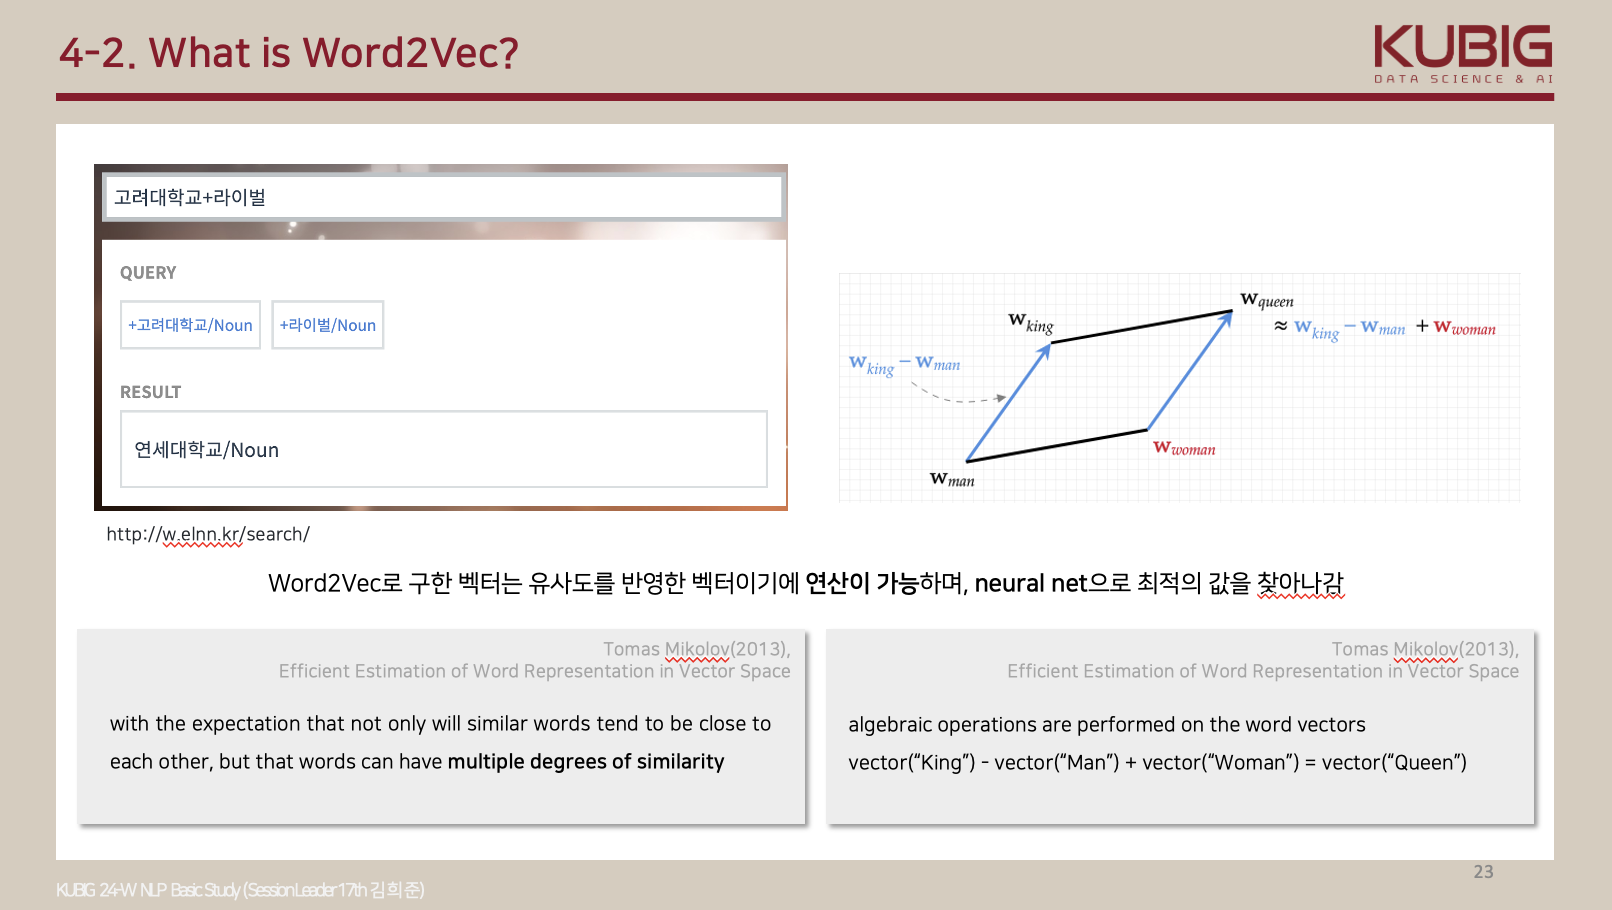
이제 word2vec를 사용하여 자모 단위로 분리하는 것이 아닌 단어 단위로 분리하여 임베딩 벡터를 생성해볼 것입니다.

In [31]:
# 간단하게 불용어 정의
stopwords = ['의','가','이','은','들','는','좀','잘','걍','과','도','를','으로','자','에','와','한','하다']

tokenized_data2 = []
for sentence in tqdm(total_data['reviews'].to_list()):
    tokenized_sentence = mecab.morphs(sentence) # 토큰화
    stopwords_removed_sentence = [word for word in tokenized_sentence if not word in stopwords] # 불용어 제거
    tokenized_data2.append(stopwords_removed_sentence)

100%|██████████| 200000/200000 [00:16<00:00, 12019.50it/s]


In [32]:
print("word2vec용 데이터:", tokenized_data2[0])
print("fasttext용 데이터:", tokenized_data[0])

word2vec용 데이터: ['배공', '빠르', '고', '굿']
fasttext용 데이터: ['ㅂㅐ-ㄱㅗㅇ', 'ㅃㅏ-ㄹㅡ-', 'ㄱㅗ-', 'ㄱㅜㅅ']


In [33]:
from gensim.models import Word2Vec

model2 = Word2Vec(sentences = tokenized_data2, vector_size = 1000, window = 5, min_count = 5, workers = 4, sg = 0)

In [34]:
# 완성된 임베딩 매트릭스의 크기 확인
# 단어의 총 개수는 14959개이고 벡터 차원은 1000으로 축소되었다.
model2.wv.vectors.shape

(15004, 1000)

## 6. FastText와 Word2Vec 결과 비교

남동생과 주문 말고도 다양한 단어를 input으로 넣어 여러분만의 해석과 인사이트를 적어주세요!

In [35]:
print("FastText 유사도:", transform(model.get_nearest_neighbors(word_to_jamo('남동생'), k=10)))
print("Word2Vec 유사도:", model2.wv.most_similar("남동생"))

FastText 유사도: [('동생', 0.8895309567451477), ('남친', 0.8558163642883301), ('남편', 0.7989221215248108), ('친구', 0.7835164666175842), ('생일', 0.7683124542236328), ('조카', 0.7323827147483826), ('남아', 0.7193372845649719), ('중학생', 0.7170660495758057), ('학생', 0.7109101414680481), ('언니', 0.6993108987808228)]
Word2Vec 유사도: [('양가', 0.7580721378326416), ('결혼', 0.7509658932685852), ('시어머님', 0.7359929084777832), ('편찮', 0.7257359027862549), ('졸업', 0.7121840715408325), ('앞둔', 0.708074152469635), ('사촌', 0.7080165147781372), ('입학', 0.6975916028022766), ('친한', 0.6898467540740967), ('엄니', 0.6879250407218933)]


In [36]:
print("FastText 유사도:", transform(model.get_nearest_neighbors(word_to_jamo('주문'), k=10)))
print("Word2Vec 유사도:", model2.wv.most_similar("주문"))

FastText 유사도: [('주문건', 0.9142076969146729), ('주문서', 0.8476126790046692), ('구매', 0.776401698589325), ('구입', 0.755933940410614), ('주문자', 0.7459467053413391), ('구매처', 0.7364295125007629), ('주무시', 0.7138693928718567), ('주무', 0.7097148895263672), ('시킨', 0.686552882194519), ('시켰었', 0.6829104423522949)]
Word2Vec 유사도: [('구매', 0.8342489004135132), ('구입', 0.8191255331039429), ('선택', 0.6248398423194885), ('시켰', 0.5590627193450928), ('결제', 0.5568322539329529), ('장만', 0.551529049873352), ('시킨', 0.5232346653938293), ('교체', 0.5208301544189453), ('도전', 0.5148407220840454), ('준비', 0.5102595090866089)]


FastText로 계산된 유사도를 보면 Word2Vec에 비해 높은 유사도를 보여줌과 동시에 의미와 형태도 더욱 근접해있는 것을 체감할 수 있다.

또한 FastText가 조금 더 단어의 생김새에 주목하는 것처럼 체감된다. 예컨대 Word2Vec는 '주문'이라는 단어에 대해 '구입', '이용', '선택' 등 생김새에 차이가 있는 다어들도 유사한 것으로 출력한 반면, FastText는 '주문건', '주문서', '주무시' 등 생김새가 닮아있는 단어들을 우선적으로 출력하고 있다. 물론 대부분 의미적으로도 맞닿아있는 단어들을 잘 출력하고 있는 것으로 보인다.

해당 데이터셋만을 놓고보았을 때는 FastText의 성능이 보다 나은 것으로 보인다.